<h1>Etivity 2</h1>

<h2>Yukti Patil  </h2>

## Import Python Modules and Bank dataset

In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("./bank.csv")
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


## Check for missing values / Count NAN Values

In [54]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

## Copy unaltered dataset before transforming the dataset

In [55]:
df_original = df

## Drop column duration 
<h5> Duration: last contact duration, in seconds (numeric). The duration attribute highly affects the output target (e.g., if duration=0 then y='no'). The duration is known only after a call is perfomed. Also, after the end of the call y is obviously known. Therefore, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.</h5>

In [56]:
df.drop('duration', axis=1, inplace=True)

## Treat Missing Values
### Convert ordinal categorical data to Numerical

### 1. Education as Ordinal
#### Replace missing values for education with mode

In [57]:
df['education'].fillna(df_original['education'].mode()[0], inplace=True)
df['education'].isnull().sum()

0

In [58]:
education_mapper = {
    "primary": 1,
    "secondary": 2,
    "tertiary": 3,
}

df['education'] = df['education'].replace(education_mapper)

In [59]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,2,no,2785,no,no,cellular,16,sep,2,-1,0,NaN,yes
1996,28.0,admin.,single,2,no,127,no,no,cellular,16,sep,2,-1,0,NaN,yes
1997,81.0,retired,married,1,no,1154,no,no,telephone,17,sep,1,-1,0,NaN,yes
1998,46.0,services,married,1,no,4343,yes,no,NaN,20,sep,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,2,no,6403,no,no,cellular,22,sep,2,-1,0,NaN,yes


### 2. Month as Ordinal
#### Convert to month ordinal to numerical

In [60]:
month_mapper = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12,
}

df['month'] = df['month'].replace(month_mapper)

In [61]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,2,no,2785,no,no,cellular,16,9,2,-1,0,NaN,yes
1996,28.0,admin.,single,2,no,127,no,no,cellular,16,9,2,-1,0,NaN,yes
1997,81.0,retired,married,1,no,1154,no,no,telephone,17,9,1,-1,0,NaN,yes
1998,46.0,services,married,1,no,4343,yes,no,NaN,20,9,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,2,no,6403,no,no,cellular,22,9,2,-1,0,NaN,yes


### One-Hot Encode All Other Categorical Attributes


In [62]:
# first one-hot encode the categorical columns with NaNs

df = pd.get_dummies(
    df, columns=['job', 'contact', 'poutcome'],
    dummy_na=True, drop_first=True
)

In [63]:
# now one-hot encode all other categorical columns
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,education,balance,day,month,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,contact_nan,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
0,32.0,3,392,1,4,2,131,2,0,0,...,0,0,0,0,0,1,0,1,0,0
1,39.0,2,688,1,4,2,133,1,0,0,...,0,0,0,0,0,0,0,1,1,0
2,59.0,2,1035,1,4,2,239,1,0,0,...,0,0,0,0,1,0,0,1,1,0
3,47.0,2,398,1,4,1,238,2,1,0,...,0,0,0,0,1,0,0,1,1,0
4,54.0,2,1004,1,4,1,307,1,0,0,...,0,0,0,0,1,0,0,1,0,0


### Treatment of Missing Values in Numerical Columns
#### Check for missing values

In [64]:
# Find the number of nulls in the dataset
df.isna().sum()

age                  12
education             0
balance               0
day                   0
month                 0
campaign              0
pdays                 0
previous              0
job_blue-collar       0
job_entrepreneur      0
job_housemaid         0
job_management        0
job_retired           0
job_self-employed     0
job_services          0
job_student           0
job_technician        0
job_unemployed        0
job_nan               0
contact_telephone     0
contact_nan           0
poutcome_other        0
poutcome_success      0
poutcome_nan          0
marital_married       0
marital_single        0
default_yes           0
housing_yes           0
loan_yes              0
subscribed_yes        0
dtype: int64

#### Impute age for missing values

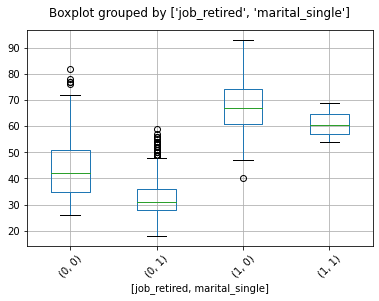

In [65]:
df.boxplot(column='age', by=['job_retired','marital_single'], rot=45)
plt.title("")
plt.show()

In [66]:
ptable = df.pivot_table(values='age', 
                        index='job_retired',
                        columns='marital_single',  
                        aggfunc=np.median)
ptable

marital_single,0,1
job_retired,,
0,42.0,31.0
1,67.0,60.5


In [67]:
def get_element(x):
    return ptable.loc[x['job_retired'], x['marital_single']]

df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)

In [68]:
df.isna().sum()

age                  0
education            0
balance              0
day                  0
month                0
campaign             0
pdays                0
previous             0
job_blue-collar      0
job_entrepreneur     0
job_housemaid        0
job_management       0
job_retired          0
job_self-employed    0
job_services         0
job_student          0
job_technician       0
job_unemployed       0
job_nan              0
contact_telephone    0
contact_nan          0
poutcome_other       0
poutcome_success     0
poutcome_nan         0
marital_married      0
marital_single       0
default_yes          0
housing_yes          0
loan_yes             0
subscribed_yes       0
dtype: int64

## Treat Outliers and Rescale Features

### Rescale Features

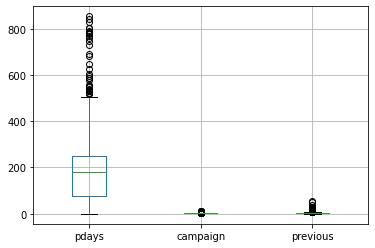

In [69]:
df.boxplot(column=['pdays', 'campaign', 'previous' ])
plt.show()

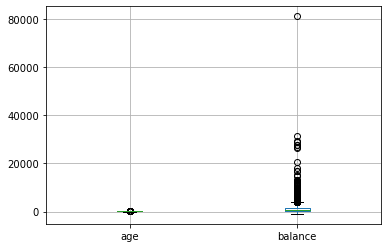

In [70]:
df.boxplot(column=['age', 'balance'])
plt.show()

In [71]:
#Rescaling 
robust_scaler = RobustScaler()
df[[  
'balance',                                  
'pdays'
]] = robust_scaler.fit_transform(df[[     
'balance',                                 
'pdays'
]])

df.tail()

,age,education,balance,day,month,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,contact_nan,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
1995,20.0,2,1.548164,16,9,2,-1.044223,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1996,28.0,2,-0.293832,16,9,2,-1.044223,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1997,81.0,1,0.417879,17,9,1,-1.044223,0,0,0,...,0,0,0,1,1,0,0,0,0,1
1998,46.0,1,2.627859,20,9,1,-1.044223,0,0,0,...,1,0,0,1,1,0,0,1,0,1
1999,40.0,2,4.055440,22,9,2,-1.044223,0,0,1,...,0,0,0,1,1,0,0,0,0,1


### Outliers
#### Age and Balance both the features have outliers

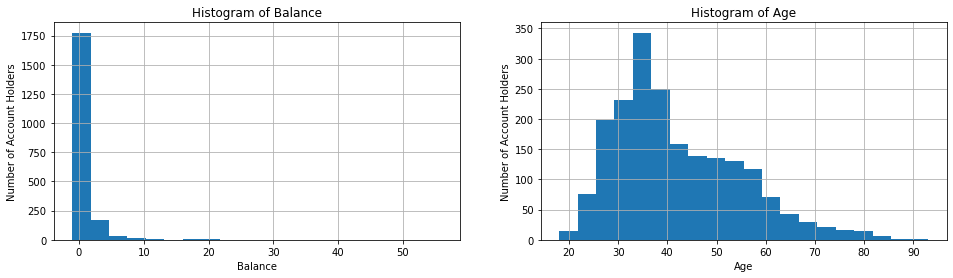

In [72]:
fig = plt.figure(figsize=(16,4))

# Plot Balance
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Balance")
ax1.set_xlabel('Balance')
ax1.set_ylabel('Number of Account Holders')
df['balance'].hist(bins=20)

# Plot Age
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of Age")
ax3.set_xlabel('Age')
ax3.set_ylabel('Number of Account Holders')
df['age'].hist(bins=20)

plt.show()

Both the plots are skewed to the left,Both histograms are skewed to the left, which is not ideal. Many ML algorithms work best when the features are not skewed to either side.

Finally, before treating the outliers, let's find the minimum values in these columns.

In [73]:
df[['age', 'balance']].min()

age        18.000000
balance    -1.060984
dtype: float64

#### 1. Age

<AxesSubplot:xlabel='age'>

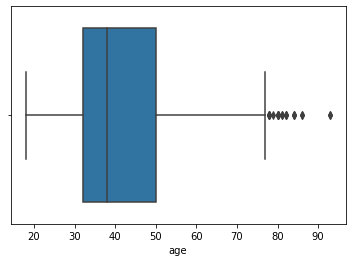

In [74]:
import seaborn as sns
sns.boxplot(x=df['age'])

In [75]:
df['age'] = df['age']/93

<AxesSubplot:xlabel='age'>

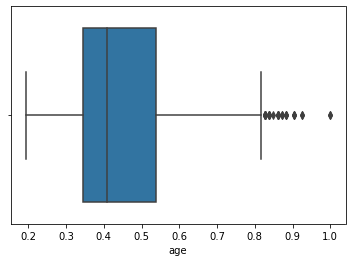

In [76]:
sns.boxplot(x=df['age'])

#### 2. Balance

##### Scaling using Robust Scalar handles outliers well, which we already did for balance. Use a log transformation to decrease the impact of outliers

In [78]:
df['balance'] = np.log(df['balance']+2.06)

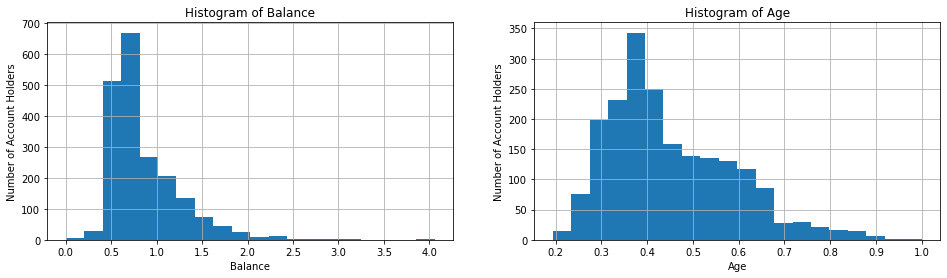

In [79]:
fig = plt.figure(figsize=(16,4))

# Plot Balance
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Balance")
ax1.set_xlabel('Balance')
ax1.set_ylabel('Number of Account Holders')
df['balance'].hist(bins=20)

# Plot Age
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of Age")
ax3.set_xlabel('Age')
ax3.set_ylabel('Number of Account Holders')
df['age'].hist(bins=20)

plt.show()

The histograms show that the transformed features are less skewed and have distributions closer to normal than the original features


## Derived Features

Combine a sparse categories. The “enlarged” categories may be somewhat arbitrary, but having less variables will simplify our predictive models and decrease the computation efforts substantially later on. We could combine a few job types, housing loans and loans.

In [58]:
#combine housing loan and loan to just loan
df['loan'] = df['housing_yes'] | df['loan_yes']

In [59]:
# combine job_entrepreneur and job_self-employed to entrepreneur
df['entrepreneur'] = df['job_entrepreneur'] | df['job_self-employed']

In [60]:
# combine job_retired and job_unemployed to unemployed
df['unemployed'] = df['job_retired'] | df['job_unemployed']

In [81]:
# combine job_housemaid and job_services to services
df['services'] = df['job_services'] | df['job_housemaid']

In [83]:
df.drop('housing_yes', axis=1, inplace=True)
df.drop('loan_yes', axis=1, inplace=True)
df.drop('job_entrepreneur', axis=1, inplace=True)
df.drop('job_self-employed', axis=1, inplace=True)
df.drop('job_unemployed', axis=1, inplace=True)
df.drop('job_services', axis=1, inplace=True)
df.drop('job_housemaid', axis=1, inplace=True)

In [84]:
df.tail()

,age,education,balance,day,month,campaign,pdays,previous,job_blue-collar,job_management,...,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,subscribed_yes,services
1995,0.215054,2,1.283199,16,9,2,-1.044223,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1996,0.301075,2,0.568812,16,9,2,-1.044223,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1997,0.870968,1,0.907403,17,9,1,-1.044223,0,0,0,...,1,0,0,0,1,1,0,0,1,0
1998,0.494624,1,1.544976,20,9,1,-1.044223,0,0,0,...,0,1,0,0,1,1,0,0,1,1
1999,0.430108,2,1.810817,22,9,2,-1.044223,0,0,0,...,0,0,0,0,1,1,0,0,1,0


## Create New Feature

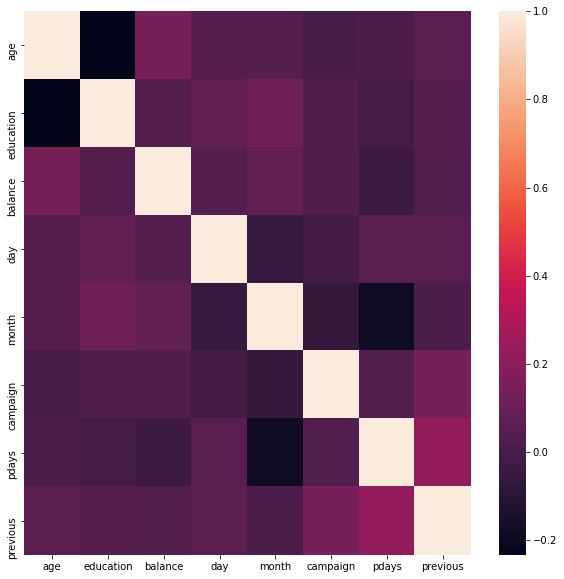

In [87]:
plt.figure(figsize = (10,10))
sns.heatmap(df_original.corr())
plt.show()

#### Trying to form a feature from a high correlated columns. 
#### 1. pdays & previous - person_contacted


##### <u>pdays</u> - the number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted); <u>previous</u> - number of contacts performed before this campaign and for this client (numeric). pdays and previous are related, we can create a feature that would tell is if a person is contacted at all

In [95]:
#if pdays is less than 0 and previous is 0, then the person was never contacted
def function1 (row):
    if row['pdays'] < 0 and row['previous'] == 0:
        return 0
    else:
        return 1
      
df['person_contacted'] = df.apply(lambda row: function1(row), axis=1)

In [96]:
df

,age,education,balance,day,month,campaign,pdays,previous,job_blue-collar,job_management,...,contact_nan,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,subscribed_yes,services,person_contacted
0,0.344086,3,0.667733,1,4,2,-0.291013,2,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0.419355,2,0.767763,1,4,2,-0.279601,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.634409,2,0.873555,1,4,2,0.325250,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.505376,2,0.669864,1,4,1,0.319544,2,1,0,...,0,0,0,0,1,0,0,0,0,1
4,0.580645,2,0.864547,1,4,1,0.713267,1,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.215054,2,1.283199,16,9,2,-1.044223,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1996,0.301075,2,0.568812,16,9,2,-1.044223,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1997,0.870968,1,0.907403,17,9,1,-1.044223,0,0,0,...,0,0,0,1,1,0,0,1,0,0
1998,0.494624,1,1.544976,20,9,1,-1.044223,0,0,0,...,1,0,0,1,1,0,0,1,1,0


#### 2. campaign & previous

##### <u>campaign</u> - number of contacts performed during this campaign and for this client (numeric, includes the last contact); <u>previous</u> - number of contacts performed before this campaign and for this client (numeric). With these columns, we can create a feature that could tell us the number a contacts made with a person. These features need to be explored in terms of how it affects Subscribed.

In [97]:
df['total_contacts'] = df['campaign'] + df['previous']
df

,age,education,balance,day,month,campaign,pdays,previous,job_blue-collar,job_management,...,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,subscribed_yes,services,person_contacted,total_contacts
0,0.344086,3,0.667733,1,4,2,-0.291013,2,0,0,...,0,0,0,0,1,0,0,0,1,4
1,0.419355,2,0.767763,1,4,2,-0.279601,1,0,0,...,0,0,0,0,0,0,0,0,1,3
2,0.634409,2,0.873555,1,4,2,0.325250,1,0,0,...,0,0,0,1,0,0,0,0,1,3
3,0.505376,2,0.669864,1,4,1,0.319544,2,1,0,...,0,0,0,1,0,0,0,0,1,3
4,0.580645,2,0.864547,1,4,1,0.713267,1,0,0,...,0,0,0,1,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.215054,2,1.283199,16,9,2,-1.044223,0,0,0,...,0,0,1,0,1,0,1,0,0,2
1996,0.301075,2,0.568812,16,9,2,-1.044223,0,0,0,...,0,0,1,0,1,0,1,0,0,2
1997,0.870968,1,0.907403,17,9,1,-1.044223,0,0,0,...,0,0,1,1,0,0,1,0,0,1
1998,0.494624,1,1.544976,20,9,1,-1.044223,0,0,0,...,0,0,1,1,0,0,1,1,0,1


## ZScore to remove outliers

#### Remove outliers by replacing it with the most repeated values

<AxesSubplot:xlabel='pdays'>

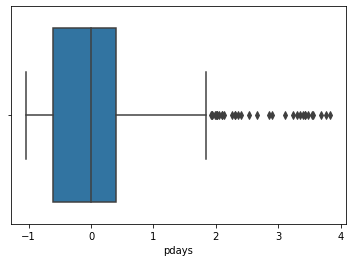

In [99]:
sns.boxplot(x=df['pdays'])

In [102]:
from scipy import stats

ndata=df['pdays']
z= np.abs(stats.zscore(ndata))
remove=np.where(z>2.5)     
#print(remove)  #index value of the outliers

l1=[]
for i in remove[0]:
    l1.append(ndata.index[[i][0]]) # storing the indexes in l1(list) to fill the values later
print(l1)

for j in l1:
    print(ndata.get(j)) #printing the outlier data

[79, 1001, 1009, 1013, 1015, 1141, 1144, 1147, 1157, 1162, 1275, 1278, 1281, 1282, 1294, 1297, 1317, 1447, 1453, 1634, 1636, 1757, 1777, 1778, 1780, 1796, 1841, 1867, 1873, 1880, 1881, 1882, 1884, 1887, 1888, 1893]
2.0199714693295294
2.533523537803138
2.3566333808844506
2.659058487874465
1.934379457917261
3.115549215406562
1.9172610556348073
3.686162624821683
3.4236804564907275
3.3038516405135523
3.3894436519258204
1.934379457917261
2.8587731811697576
1.9800285306704708
2.014265335235378
3.43509272467903
1.9971469329529243
1.8373751783166905
2.30527817403709
2.1055634807417976
2.1283880171184024
2.0998573466476462
2.898716119828816
1.8316690442225392
3.549215406562054
3.5549215406562054
2.048502139800285
2.265335235378031
3.2353780313837377
3.3495007132667616
2.310984308131241
3.4807417974322394
3.8345221112696146
3.7660485021398005
2.4022824536376604
1.8373751783166905


In [104]:
for k in l1:
    #new_df.set_value(k, 'pdays', df['pdays'].mode()[0])
    df.at[k,'pdays']=df_original['pdays'].mode()[0]  #replacing the outlier values with the most repeated values

#### Box plot after removing outliers

<AxesSubplot:xlabel='pdays'>

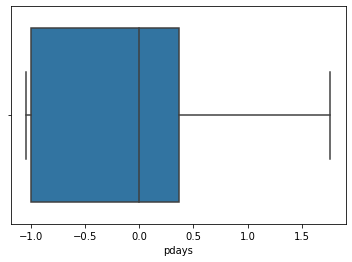

In [106]:
sns.boxplot(x=df['pdays'])

## Data has been prepared now by handling missing data, treating outliers and rescaling. 
### New data as below

In [107]:
df

,age,education,balance,day,month,campaign,pdays,previous,job_blue-collar,job_management,...,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,subscribed_yes,services,person_contacted,total_contacts
0,0.344086,3,0.667733,1,4,2,-0.291013,2,0,0,...,0,0,0,0,1,0,0,0,1,4
1,0.419355,2,0.767763,1,4,2,-0.279601,1,0,0,...,0,0,0,0,0,0,0,0,1,3
2,0.634409,2,0.873555,1,4,2,0.325250,1,0,0,...,0,0,0,1,0,0,0,0,1,3
3,0.505376,2,0.669864,1,4,1,0.319544,2,1,0,...,0,0,0,1,0,0,0,0,1,3
4,0.580645,2,0.864547,1,4,1,0.713267,1,0,0,...,0,0,0,1,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.215054,2,1.283199,16,9,2,-1.044223,0,0,0,...,0,0,1,0,1,0,1,0,0,2
1996,0.301075,2,0.568812,16,9,2,-1.044223,0,0,0,...,0,0,1,0,1,0,1,0,0,2
1997,0.870968,1,0.907403,17,9,1,-1.044223,0,0,0,...,0,0,1,1,0,0,1,0,0,1
1998,0.494624,1,1.544976,20,9,1,-1.044223,0,0,0,...,0,0,1,1,0,0,1,1,0,1


## Save the new dataset 

In [108]:
df.to_csv('prepared_dataset_bank.csv')